# Лабораторная работа №3

## Условие

Вариант №7

Распределения:

$$\mathbf{X_1} \sim N(-1, 2)$$
$$\mathbf{X_2} \sim R(-2, 0)$$
$$\mathbf{X_3} \sim N(2, 1)$$


Объёмы выборок:

$$ n_1 = 100$$
$$ n_2 = 100$$
$$ n_3 = 200$$

## Импорты

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats
from time import time
from IPython.display import display, Markdown  # для вывода формул в консоль
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Определения

In [2]:
m1, std1, n1 = -1, 2, 100
a2, b2, n2 = -2, 0, 100
m3, std3, n3 = 2, 1, 100

In [3]:
def mprint(*strings):
    for s in strings:
        display(Markdown(s))


np.random.seed(int(time()))
plt.rc("text", usetex=True)
plt.rc(
    "text.latex",
    preamble=r"""
\usepackage[english, russian]{babel}
\usepackage[utf8]{inputenc}
""",
)
plt.style.use("seaborn-v0_8")

In [4]:
alpha = 0.05


def verdict(alpha, p_value):
    if alpha > p_value:
        return "$H_0$ отклоняется"
    else:
        return "$H_0$ принимается"

## Исходные данные

## 1. Исходные данные

| СВ             | Распределение | Параметры                | Математическое ожидание, $m_i$    | Дисперсия, $\sigma_i^2$                                 | Объём выборки, $n_i$ |
| -------------- | ------------- | ------------------------ | --------------------------------- | ------------------------------------------------------- | -------------------- |
| $\mathbf{X_1}$ | $N(-1, 2)$    | $m_1 = -1, \sigma_1 = 2$ | $m_1 = -1$                        | $\sigma_1^2 = 4$                                        | 100                  |
| $\mathbf{X_2}$ | $R(-2, 0)$    | $a_2 = -2, b_2 = 0$      | $m_2 = \dfrac{a_2 + b_2}{2} = -1$ | $\sigma_2^2 = \dfrac{(b_2 - a_2)^2}{12} = \dfrac{1}{3}$ | 100                  |
| $\mathbf{X_3}$ | $N(2, 1)$     | $m_3 = 2, \sigma_3 = 1$  | $m_3 = 2$                         | $\sigma_3^2 = 1$                                        | 200                  |


In [6]:
k = 3

X1 = np.random.normal(m1, std1, n1)
X2 = np.random.uniform(a2, b2, n2)
X3 = np.random.normal(m3, std3, n3)

X = [X1, X2, X3]
n = [n1, n2, n3]

mprint(f"$X_1$: {X1[:10].round(2)}")
mprint(f"$X_2$: {X2[:10].round(2)}")
mprint(f"$X_3$: {X3[:10].round(2)}")

$X_1$: [ 1.44 -3.51 -0.23  0.66  0.15  0.43 -4.1  -0.82 -3.77 -5.75]

$X_2$: [-0.44 -0.52 -1.54 -1.86 -0.37 -1.63 -0.72 -1.43 -0.45 -1.8 ]

$X_3$: [2.17 1.46 0.68 2.14 1.77 2.95 3.04 1.7  1.43 0.95]

### Выборочные характеристики

In [9]:
mean1 = X1.mean()
S1 = X1.var(ddof=1)
s1 = X1.std(ddof=1)

mean2 = X2.mean()
S2 = X2.var(ddof=1)
s2 = X2.std(ddof=1)

mean3 = X3.mean()
S3 = X3.var(ddof=1)
s3 = X3.std(ddof=1)

X_pooled = np.concatenate(X)
n_pooled = sum(n)

mean_pooled = X_pooled.mean()
S_pooled = X_pooled.var(ddof=1)
s_pooled = X_pooled.std(ddof=1)

mprint(f"$\\overline{{x_1}} =$ {mean1:.2f}, $s_1^2 =$ {S1:.2f}, $s_1$ = {s1:.2f}")
mprint(f"$\\overline{{x_2}} =$ {mean2:.2f}, $s_2^2 =$ {S2:.2f}, $s_2$ = {s2:.2f}")
mprint(f"$\\overline{{x_3}} =$ {mean3:.2f}, $s_3^2 =$ {S3:.2f}, $s_3$ = {s3:.2f}")
mprint(
    f"$\\overline{{x_{{pooled}}}} =$ {mean_pooled:.2f}, $s_{{pooled}}^2 =$ {S_pooled:.2f}, $s_{{pooled}}$ = {s_pooled:.2f}"
)

$\overline{x_1} =$ -0.87, $s_1^2 =$ 3.88, $s_1$ = 1.97

$\overline{x_2} =$ -0.92, $s_2^2 =$ 0.33, $s_2$ = 0.57

$\overline{x_3} =$ 2.01, $s_3^2 =$ 0.86, $s_3$ = 0.93

$\overline{x_{pooled}} =$ 0.07, $s_{pooled}^2 =$ 3.56, $s_{pooled}$ = 1.89

| СВ            | Среднее, $\overline{x_i}$ | Оценка дисперсии, $s_i^2$ | Оценка с.к.о., $s_i$ |
| ------------- | ------------------------- | ------------------------- | -------------------- |
| $\mathbf{X1}$ | -0.87                     | 3.88                      | 1.97                 |
| $\mathbf{X2}$ | -0.92                     | 0.33                      | 0.57                 |
| $\mathbf{X3}$ | 2.01                      | 0.86                      | 0.93                 |
| Pooled        | 0.07                      | 3.56                      | 1.89                 |

## 2. Визуальное представление выборки

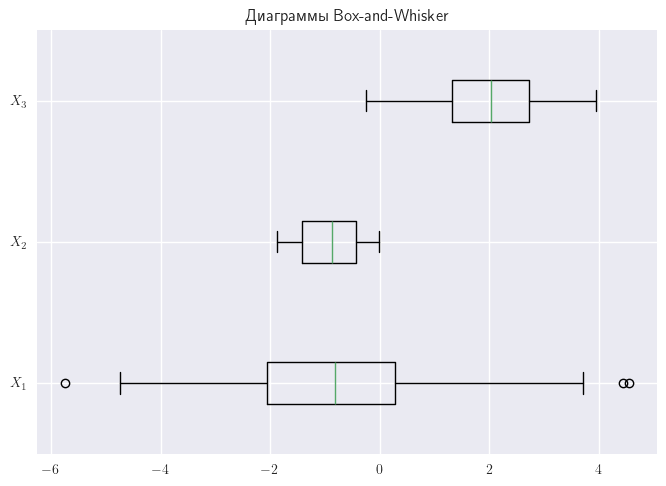

In [11]:
plt.boxplot(
    X,
    tick_labels=[r"$X_1$", r"$X_2$", r"$X_3$"],
    vert=False,
    boxprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
    flierprops=dict(markeredgecolor="black"),
)

plt.title("Диаграммы Box-and-Whisker")
plt.show()

## 3. Проверка условия применимости дисперсионного анализа

Статистическая гипотеза: $H_0: \sigma_1^2 = \sigma_2^2 = \sigma_3^2$

In [12]:
z, p_value = stats.bartlett(X1, X2, X3)

mprint(
    r"### Bartlett’s test",
    f"$H_0: \\sigma_1^2 = \\sigma_2^2 = \\sigma_3^2$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
    verdict(alpha, p_value),
)

### Bartlett’s test

$H_0: \sigma_1^2 = \sigma_2^2 = \sigma_3^2$

$z_{выб} =$ 145.96

$p =$ 0.00

$H_0$ отклоняется

Критерий Бартлетта:
| Выборочное значение статистики критерия | p-value | Статистическое решение при $\alpha = 0.05$ | Ошибка статистического решения |
| --------------------------------------- | ------- | ------------------------------------------ | ------------------------------ |
| 145.96                                  | 0.00    | $H_0$ отклоняется                          | Нет                            |

## 4. Однофакторный дисперсионный анализ

In [13]:
S_general = X_pooled.var()
S_inside = 1 / n_pooled * sum([n[i] * X[i].var() for i in range(k)])
S_between = S_general - S_inside

S_general_unbiased = S_general * n_pooled / (n_pooled - 1)
S_inside_unbiased = S_inside * n_pooled / (n_pooled - k)
S_between_unbiased = S_between * n_pooled / (k - 1)

mprint(
    f"$\\tilde{{D}}_{{\\text{{межгр}}}} = {S_between:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{внутр}}}} = {S_inside:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{общ}}}} = {S_general:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{межгр, несмещ}}}} = {S_between_unbiased:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{внутр, несмещ}}}} = {S_inside_unbiased:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{общ, несмещ}}}} = {S_general_unbiased:.2f}$",
)

$\tilde{D}_{\text{межгр}} = 1.88$

$\tilde{D}_{\text{внутр}} = 1.67$

$\tilde{D}_{\text{общ}} = 3.55$

$\tilde{D}_{\text{межгр, несмещ}} = 281.77$

$\tilde{D}_{\text{внутр, несмещ}} = 1.69$

$\tilde{D}_{\text{общ, несмещ}} = 3.56$

Таблица дисперсионного анализа:

| Источник вариации      | Показатель вариации               | Число степеней свободы | Несмещённая оценка                                  |
| ---------------------- | --------------------------------- | ---------------------- | --------------------------------------------------- |
| Группировочный признак | $\tilde{D}_{\text{межгр}} = 1.88$ | $k - 1 = 2$            | $\dfrac{n}{k - 1}\tilde{D}_{\text{межгр}} = 281.77$ |
| Остаточные факторы     | $\tilde{D}_{\text{внутр}} = 1.67$ | $n - k = 297$          | $\dfrac{n}{n - k}\tilde{D}_{\text{внутр}} = 1.69$   |
| Все факторы            | $\tilde{D}_{\text{общ}} = 3.55$   | $n - 1 = 299$          | $\dfrac{n}{n - 1}\tilde{D}_{\text{общ}} = 3.56$     |

In [15]:
eta_squared = S_between / S_general

eta = sqrt(eta_squared)

mprint(
    f"$\\tilde{{\\eta^2}} = {eta_squared:.2f}$",
    f"$\\tilde{{\\eta}} = {eta:.2f}$",
)

$\tilde{\eta^2} = 0.53$

$\tilde{\eta} = 0.73$

Эмпирирический коэффициент детерминации $\tilde{\eta^2} = \dfrac{\tilde{D}_{\text{межгр}}}{\tilde{D}_{\text{общ}}} = 0.53$

Эмпирическое корреляционное отношение $\tilde{\eta} = \sqrt{\tilde{\eta^2}} = 0.73$

Статистическая гипотеза: $H_0: m_1 = m_2 = m_3$

In [16]:
# можно использовать функцию f_oneway, но критерий простой и я напишу его сам

z = S_between_unbiased / S_inside_unbiased
p_value = stats.f.sf(z, k - 1, n_pooled - k)

mprint(
    r"### ANOVA",
    f"$H_0: m_1 = m_2 = m_3$",
    f"$z_{{выб}} = {z:.2f}$",
    f"$p = {p_value:.2f}$",
    verdict(alpha, p_value),
)

### ANOVA

$H_0: m_1 = m_2 = m_3$

$z_{выб} = 166.84$

$p = 0.00$

$H_0$ отклоняется

| Выборочное значение статистики критерия | p-value | Статистическое решение при $\alpha = 0.05$ | Ошибка статистического решения |
| --------------------------------------- | ------- | ------------------------------------------ | ------------------------------ |
| 166.84                                  | 0.00    | $H_0$ отклоняется                          | Нет                            |

## Метод линейных контрастов

### Доверительные интервалы для $m_1, \dots, m_k$

In [17]:
intervals = pd.DataFrame(index=["Нижняя граница", "Верхняя граница"])
for data, N, i in zip(X, n, range(1, k + 1)):
    std_err = stats.sem(data)
    intervals[f"$X_{i}$"] = stats.t.interval(
        1 - alpha, df=N - 1, loc=np.mean(data), scale=std_err
    )

intervals

,$X_1$,$X_2$,$X_3$
Нижняя граница,-1.256599,-1.038470,1.827181
Верхняя граница,-0.475312,-0.811383,2.195853


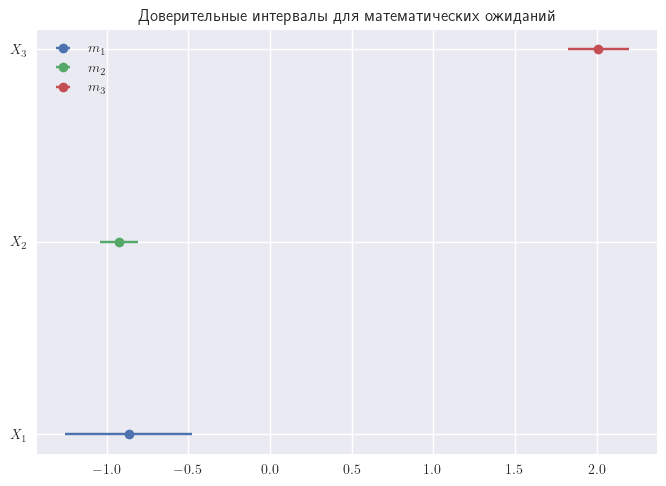

In [18]:
for interval, y in zip(intervals.columns, range(1, k + 1)):
    plt.errorbar(
        intervals[interval].mean(),
        y,
        xerr=(intervals[interval].mean() - intervals[interval].iloc[0]),
        fmt="o",
        label=f"$m_{y}$",
    )

plt.yticks(range(1, k + 1), [f"$X_{i}$" for i in range(1, k + 1)])
plt.legend(loc="upper left")
plt.title("Доверительные интервалы для математических ожиданий")
plt.show()

### Попарные сравнения $m_i$ и $m_j$

In [19]:
grouped = pd.DataFrame({"data": X_pooled, "group": np.repeat(range(1, k + 1), n)})
grouped

,data,group
0,1.440171,1
1,-3.507674,1
2,-0.231784,1
3,0.664483,1
4,0.154523,1
...,...,...
295,2.172269,3
296,2.400683,3
297,1.352911,3
298,3.015934,3


In [20]:
result = pairwise_tukeyhsd(endog=grouped["data"], groups=grouped["group"], alpha=alpha)
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   -0.059 0.9448 -0.4919 0.3739  False
     1      3   2.8775    0.0  2.4446 3.3104   True
     2      3   2.9364    0.0  2.5035 3.3694   True
---------------------------------------------------


In [21]:
df = pd.DataFrame(
    data=result._results_table.data[1:],
    columns=[
        "m_i",
        "m_j",
        "z",
        "p-value",
        "lower",
        "upper",
        "Отклонение H_0",
    ],
)

df

,m_i,m_j,z,p-value,lower,upper,Отклонение H_0
0,1,2,-0.0590,0.9448,-0.4919,0.3739,False
1,1,3,2.8775,0.0000,2.4446,3.3104,True
2,2,3,2.9364,0.0000,2.5035,3.3694,True


| Гипотеза          | Выборочное значение статистики критерия | $p$-value | Статистическое решение при $\alpha = 0.05$ | Ошибка статистического решения |
| ----------------- | --------------------------------------- | --------- | ------------------------------------------ | ------------------------------ |
| $H_0:\ m_1 = m_2$ | -0.06                                   | 0.94      | $H_0$ принимается                          | Нет                            |
| $H_0:\ m_1 = m_3$ | 2.88                                    | 0.00      | $H_0$ отклоняется                          | Нет                            |
| $H_0:\ m_2 = m_3$ | 2.94                                    | 0.00      | $H_0$ отклоняется                          | Нет                            |
